In [1]:
# Overview of the accuracy of ProtoNN when gamma is calculated heuristically

# import ProtoNN code
import protoNN as protograph
import protoNNTrainer as prototrainer
import utils as utils
# import general libraries
import numpy as np
import torch
from sklearn.model_selection import train_test_split

# need to change the dataset location
X, Y = utils.handleUSPS('../../../data_set/usps.h5')

dataset = utils.CustomDatasetProtoNN(X, Y, rescaling=True, binary=False)

C:\Users\pietr\anaconda3\envs\edgeml\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset input rescaled
Dataset loaded, input space: (7291, 256) , output space: (7291, 1)
Dataset reshaped, input space: (7291, 256) , output space: (7291, 10)


In [2]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset.data, dataset.labels, test_size=0.2, random_state=0)
train_inputs = torch.from_numpy(X_train.astype(np.float32))
train_targets = torch.from_numpy(Y_train.astype(np.float32))
test_inputs = torch.from_numpy(X_test.astype(np.float32))
test_targets = torch.from_numpy(Y_test.astype(np.float32))
print("Dataset splitted: TRAINING:", train_inputs.shape[0], "TESTING:", test_inputs.shape[0])

Dataset splitted: TRAINING: 5832 TESTING: 1459


In [3]:
# DEFINITION OF HYPERPARAMETER FOR THE PROBLEM
input_dimension = X_train.shape[1]
numOutputLabels = dataset.numClasses
numPrototypes = 20
projection_dimension = 15

# regularizer of W, B and Z: HYPERPARAMETER
regW, regB, regZ = 0, 0, 0

# sparsity of W, B and Z: HYPERPARAMETER, CONSTRAINTS OF MEMORY
sparcityW, sparcityB, sparcityZ = 1, 1, 1

np.random.seed(0)

# initialize W as random - to use random seed fixed for testing
W = np.random.rand(input_dimension, projection_dimension)

# print structure of ProtoNN
print("input dim:\t", input_dimension,
      "\nnum class:\t", numOutputLabels,
      "\nnum prototypes:\t", numPrototypes,
      "\nporjection dim:\t", projection_dimension)

# initial learning rate of the OPTIMIZER: HYPERPARAMETER
learningRate = 0.1
# lossType: 'l2'
lossType= 'l2'

# TRAINING PHASE
# batchsize: HAS TO BE DEFINED
batchsize = 100
# epochs: HAS TO BE DEFINED
epochs = 100
# printStep: HAS TO BE DEFINED
printStep = 1000
# valStep: HAS TO BE DEFINED
valStep = 100

# print virables of ProtoNN training
print("\nbatch size:\t", batchsize,
      "\nepochs:\t\t", epochs,
      "\nprint step:\t", printStep,
      "\nevaluation step:", valStep)

input dim:	 256 
num class:	 10 
num prototypes:	 20 
porjection dim:	 15

batch size:	 100 
epochs:		 100 
print step:	 1000 
evaluation step: 100


In [4]:
# protoNN with heuristic gamma
protoNNmodel = protograph.ProtoNN(input_dimension, projection_dimension,
                                  numPrototypes, numOutputLabels,
                                  gamma=0.5
                                  , W=W)
protoNNmodel.initializePrototypesAndGamma(train_inputs, train_targets,
                                          input_W=W, overrideGamma=True)
_, _, _, _, gamma = protoNNmodel.getHyperParams()
protoNNtrainer = prototrainer.ProtoNNTrainer(protoNNmodel,
                                             sparcityW, sparcityB, sparcityZ,
                                             regW, regB, regZ,
                                             learningRate,
                                             lossType)
print("Model size:", protoNNmodel.getModelSizeAsDense(), "KB")
result_heuristic = protoNNtrainer.train(
                              train_inputs.float(),
                              test_inputs.float(),
                              train_targets.float(),
                              test_targets.float(),
                              batchsize,
                              epochs,
                              printStep,
                              valStep,
                              verbose=False, history=True)


Model size: 17.36 KB


In [5]:
# protoNN with default gamma 0.05
protoNNmodel = protograph.ProtoNN(input_dimension, projection_dimension,
                                  numPrototypes, numOutputLabels,
                                  gamma=0.05
                                  , W=W)
protoNNmodel.initializePrototypesAndGamma(train_inputs, train_targets,
                                          input_W=W, overrideGamma=False)
protoNNtrainer = prototrainer.ProtoNNTrainer(protoNNmodel,
                                             sparcityW, sparcityB, sparcityZ,
                                             regW, regB, regZ,
                                             learningRate,
                                             lossType)
print("Model size:", protoNNmodel.getModelSizeAsDense(), "KB")
result_gamma_a = protoNNtrainer.train(
                              train_inputs.float(),
                              test_inputs.float(),
                              train_targets.float(),
                              test_targets.float(),
                              batchsize,
                              epochs,
                              printStep,
                              valStep,
                              verbose=False, history=True)


Model size: 17.36 KB


In [6]:
# protoNN with default gamma 0.005
protoNNmodel = protograph.ProtoNN(input_dimension, projection_dimension,
                                  numPrototypes, numOutputLabels,
                                  gamma=0.005
                                  , W=W)
protoNNmodel.initializePrototypesAndGamma(train_inputs, train_targets,
                                          input_W=W, overrideGamma=False)
protoNNtrainer = prototrainer.ProtoNNTrainer(protoNNmodel,
                                             sparcityW, sparcityB, sparcityZ,
                                             regW, regB, regZ,
                                             learningRate,
                                             lossType)
print("Model size:", protoNNmodel.getModelSizeAsDense(), "KB")
result_gamma_b = protoNNtrainer.train(
                              train_inputs.float(),
                              test_inputs.float(),
                              train_targets.float(),
                              test_targets.float(),
                              batchsize,
                              epochs,
                              printStep,
                              valStep,
                              verbose=False, history=True)

Model size: 17.36 KB


In [7]:
# protoNN with default gamma 0.0005
protoNNmodel = protograph.ProtoNN(input_dimension, projection_dimension,
                                  numPrototypes, numOutputLabels,
                                  gamma=0.0005
                                  , W=W)
protoNNmodel.initializePrototypesAndGamma(train_inputs, train_targets,
                                          input_W=W, overrideGamma=False)
protoNNtrainer = prototrainer.ProtoNNTrainer(protoNNmodel,
                                             sparcityW, sparcityB, sparcityZ,
                                             regW, regB, regZ,
                                             learningRate,
                                             lossType)
print("Model size:", protoNNmodel.getModelSizeAsDense(), "KB")
result_gamma_c = protoNNtrainer.train(
                              train_inputs.float(),
                              test_inputs.float(),
                              train_targets.float(),
                              test_targets.float(),
                              batchsize,
                              epochs,
                              printStep,
                              valStep,
                              verbose=False, history=True)

Model size: 17.36 KB


In [8]:
import matplotlib.pyplot as plt
import winsound

accuarcy_heuristic = np.array(result_heuristic.get('accuracyThroughEpochs'))
accuarcy_a = np.array(result_gamma_a.get('accuracyThroughEpochs'))
accuracy_b = np.array(result_gamma_b.get('accuracyThroughEpochs'))
accuarcy_c = np.array(result_gamma_c.get('accuracyThroughEpochs'))

<function matplotlib.pyplot.show(close=None, block=None)>

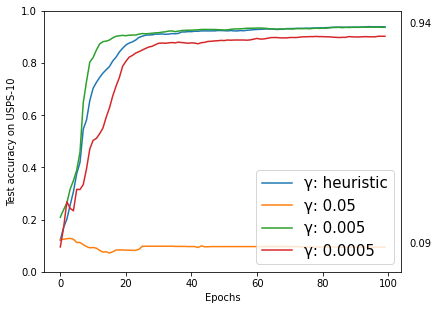

In [9]:
plt.rcParams["figure.figsize"] = (2,3)
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.plot(accuarcy_heuristic)
plt.plot(accuarcy_a)
plt.plot(accuracy_b)
plt.plot(accuarcy_c)
for var in (accuarcy_heuristic, accuarcy_a):
    plt.annotate('%0.2f' % var[-1], xy=(1, var[-1]), xytext=(8, 0), 
             xycoords=('axes fraction', 'data'), textcoords='offset points')
#plt.title('Effect of various parameters',fontweight='bold')
plt.ylabel('Test accuracy on USPS-10')
plt.ylim([0,1])
plt.xlabel('Epochs')
plt.legend(['\u03B3: heuristic', '\u03B3: 0.05', '\u03B3: 0.005', '\u03B3: 0.0005'], loc='lower right', prop={'size':15})
plt.show

In [10]:
correct = result_heuristic.get('correctPredictions').item()
total  = result_heuristic.get('totalPredictions')
print("Accuracy with Heuristic Gamma:\t\t", correct / total)
correct = result_gamma_a.get('correctPredictions').item()
total  = result_gamma_a.get('totalPredictions')
print("Accuracy with fixed Gamma 0.05:\t\t", correct / total)
correct = result_gamma_b.get('correctPredictions').item()
total  = result_gamma_b.get('totalPredictions')
print("Accuracy with fixed Gamma 0.005:\t", correct / total)
correct = result_gamma_c.get('correctPredictions').item()
total  = result_gamma_c.get('totalPredictions')
print("Accuracy with fixed Gamma 0.0005:\t", correct / total)

Accuracy with Heuristic Gamma:		 0.9389993145990404
Accuracy with fixed Gamma 0.05:		 0.09458533241946539
Accuracy with fixed Gamma 0.005:	 0.9369431117203564
Accuracy with fixed Gamma 0.0005:	 0.9026730637422893


In [11]:
print(gamma)

0.002403314248929135


In [12]:
# to notify that I'm done running
duration = 1000  # milliseconds
freq = 440  # Hz
winsound.Beep(freq, duration)
winsound.Beep(500, duration)